In [1]:
from google.colab import files
uploaded = files.upload()

Saving amia.csv to amia.csv


In [2]:
import pandas as pd
amia = pd.read_csv('amia.csv')
amia

,pmc_id,title,authors,authors_information,year,abstract
0,PMCID:PMC8075400,Association of White Matter Hyperintensity Pro...,Kentaro Hirao,"aDepartment of Geriatric Medicine, Tokyo Medic...",J Alzheimers Dis.2021; 80(2): 877–883.,White matter hyperintensities (WMH) on MRI hav...
1,PMCID:PMC8075401,Mild Behavioral Impairment and Subjective Cogn...,Fumio Yamashita,"bDepartment of Ultrahigh Field MRI, Institute ...",J Alzheimers Dis.2021; 80(1): 459–469.,Mild behavioral impairment (MBI) and subjectiv...
2,PMCID:PMC8075402,Safety Monitoring of Gene Therapy for Spinal M...,Akito Tsugawa,"aDepartment of Psychiatry, University of Calga...",J Neuromuscul Dis.2021; 8(2): 209–216.,Recently gene therapy with onasemnogene abepar...
3,PMCID:PMC8075403,Assessing the Progression of Alzheimer’s Disea...,Rieko Haime,"bDepartment of Clinical Neurosciences, Univers...",J Alzheimers Dis.2021; 80(2): 749–759.,There exists considerable variation in disease...
4,PMCID:PMC8075404,Investigating the Spatial Associations Between...,Raita Fukasawa,"cDepartment of Community Health Sciences, Univ...",J Alzheimers Dis.2021; 80(1): 113–132.,It has been proposed that amyloid-β (Aβ) plays...
...,...,...,...,...,...,...
5077,PMCID:PMC2581286,A Comparison of Models for Predicting the Outc...,Harriet H. Werley,Harriet H. Werley,Proc Annu Symp Comput Appl Med Care.1981 Nov 4...,There are several basic strategies that may be...
5078,PMCID:PMC2581287,Impact of Computers on Nursing Research,Donna L. HudsonandThelma Estrin,Donna L. HudsonandThelma Estrin,Proc Annu Symp Comput Appl Med Care.1981 Nov 4...,A microcomputer-based medical information syst...
5079,PMCID:PMC2581288,Microcomputer-Based Expert System for Clinical...,Virginia K. Saba,Virginia K. Saba,Proc Annu Symp Comput Appl Med Care.1981 Nov 4...,A substantial portion of the information in th...
5080,PMCID:PMC2581289,Impact of Computers on Nursing Administration ...,Jane BarnettandDavid Kramlich,Jane BarnettandDavid Kramlich,Proc Annu Symp Comput Appl Med Care.1981 Nov 4...,A computer-aided interactive “game” has been d...


In [3]:
#Data Cleaning

#Cleaning pmc_id - we want only number in pmc_id

def numbers(element):
    
    return "".join(filter(str.isnumeric, element))


amia['pmc_id'] = [numbers(x) for x in amia.pmc_id]
amia

# pmc_id is cleaned

,pmc_id,title,authors,authors_information,year,abstract
0,8075400,Association of White Matter Hyperintensity Pro...,Kentaro Hirao,"aDepartment of Geriatric Medicine, Tokyo Medic...",J Alzheimers Dis.2021; 80(2): 877–883.,White matter hyperintensities (WMH) on MRI hav...
1,8075401,Mild Behavioral Impairment and Subjective Cogn...,Fumio Yamashita,"bDepartment of Ultrahigh Field MRI, Institute ...",J Alzheimers Dis.2021; 80(1): 459–469.,Mild behavioral impairment (MBI) and subjectiv...
2,8075402,Safety Monitoring of Gene Therapy for Spinal M...,Akito Tsugawa,"aDepartment of Psychiatry, University of Calga...",J Neuromuscul Dis.2021; 8(2): 209–216.,Recently gene therapy with onasemnogene abepar...
3,8075403,Assessing the Progression of Alzheimer’s Disea...,Rieko Haime,"bDepartment of Clinical Neurosciences, Univers...",J Alzheimers Dis.2021; 80(2): 749–759.,There exists considerable variation in disease...
4,8075404,Investigating the Spatial Associations Between...,Raita Fukasawa,"cDepartment of Community Health Sciences, Univ...",J Alzheimers Dis.2021; 80(1): 113–132.,It has been proposed that amyloid-β (Aβ) plays...
...,...,...,...,...,...,...
5077,2581286,A Comparison of Models for Predicting the Outc...,Harriet H. Werley,Harriet H. Werley,Proc Annu Symp Comput Appl Med Care.1981 Nov 4...,There are several basic strategies that may be...
5078,2581287,Impact of Computers on Nursing Research,Donna L. HudsonandThelma Estrin,Donna L. HudsonandThelma Estrin,Proc Annu Symp Comput Appl Med Care.1981 Nov 4...,A microcomputer-based medical information syst...
5079,2581288,Microcomputer-Based Expert System for Clinical...,Virginia K. Saba,Virginia K. Saba,Proc Annu Symp Comput Appl Med Care.1981 Nov 4...,A substantial portion of the information in th...
5080,2581289,Impact of Computers on Nursing Administration ...,Jane BarnettandDavid Kramlich,Jane BarnettandDavid Kramlich,Proc Annu Symp Comput Appl Med Care.1981 Nov 4...,A computer-aided interactive “game” has been d...


In [4]:
# Cleaning  year - we want only four digit year in this column
import re
def find_number(text):
    for num in re.findall(r'(\d{4})',text):
      if int(num) > 1979:
        return " ".join(num)

amia['year']=amia['year'].apply(lambda x: find_number(x))
amia.year = amia.year.str.replace(' ', '')

# year is cleaned

In [5]:
#checking for pmc_id and year by displaying all the rows
pd.options.display.max_rows=1044
amia

,pmc_id,title,authors,authors_information,year,abstract
0,8075400,Association of White Matter Hyperintensity Pro...,Kentaro Hirao,"aDepartment of Geriatric Medicine, Tokyo Medic...",2021,White matter hyperintensities (WMH) on MRI hav...
1,8075401,Mild Behavioral Impairment and Subjective Cogn...,Fumio Yamashita,"bDepartment of Ultrahigh Field MRI, Institute ...",2021,Mild behavioral impairment (MBI) and subjectiv...
2,8075402,Safety Monitoring of Gene Therapy for Spinal M...,Akito Tsugawa,"aDepartment of Psychiatry, University of Calga...",2021,Recently gene therapy with onasemnogene abepar...
3,8075403,Assessing the Progression of Alzheimer’s Disea...,Rieko Haime,"bDepartment of Clinical Neurosciences, Univers...",2021,There exists considerable variation in disease...
4,8075404,Investigating the Spatial Associations Between...,Raita Fukasawa,"cDepartment of Community Health Sciences, Univ...",2021,It has been proposed that amyloid-β (Aβ) plays...
...,...,...,...,...,...,...
5077,2581286,A Comparison of Models for Predicting the Outc...,Harriet H. Werley,Harriet H. Werley,1981,There are several basic strategies that may be...
5078,2581287,Impact of Computers on Nursing Research,Donna L. HudsonandThelma Estrin,Donna L. HudsonandThelma Estrin,1981,A microcomputer-based medical information syst...
5079,2581288,Microcomputer-Based Expert System for Clinical...,Virginia K. Saba,Virginia K. Saba,1981,A substantial portion of the information in th...
5080,2581289,Impact of Computers on Nursing Administration ...,Jane BarnettandDavid Kramlich,Jane BarnettandDavid Kramlich,1981,A computer-aided interactive “game” has been d...


In [31]:
list(amia)

['pmc_id', 'title', 'authors', 'authors_information', 'year', 'abstract']

In [6]:

#cleaning abstract - we want clean text in this column
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.corpus import stopwords

amia['abstract'] = amia['abstract'].apply(lambda x: " ".join(x.lower() for x in str(x).split()))

amia['abstract'] = amia['abstract'].str.replace('[^\w\s]','')

stop = stopwords.words('english')
amia['abstract'] = amia['abstract'].apply(lambda x: " ".join(x for x in str(x).split() if x not in stop))

common = pd.Series(' '.join(amia['abstract']).split()).value_counts()[:10]

amia['abstract'] = amia['abstract'].apply(lambda x: " ".join(x for x in str(x).split() if x not in common))

rare = pd.Series(' '.join(amia['abstract']).split()).value_counts()[-10:]
amia['abstract'] = amia['abstract'].apply(lambda x: " ".join(x for x in str(x).split() if x not in rare))

from textblob import TextBlob
amia['abstract'][:5].apply(lambda x: str(TextBlob(x).correct()))

TextBlob(amia['abstract'][1]).words

from nltk.stem import PorterStemmer
st = PorterStemmer()
amia['abstract'][:5].apply(lambda x: " ".join([st.stem(word) for word in str(x).split()]))

from textblob import Word
amia['abstract'] = amia['abstract'].apply(lambda x: " ".join([Word(word).lemmatize() for word in str(x).split()]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [7]:
amia

,pmc_id,title,authors,authors_information,year,abstract
0,8075400,Association of White Matter Hyperintensity Pro...,Kentaro Hirao,"aDepartment of Geriatric Medicine, Tokyo Medic...",2021,white matter hyperintensities wmh mri reported...
1,8075401,Mild Behavioral Impairment and Subjective Cogn...,Fumio Yamashita,"bDepartment of Ultrahigh Field MRI, Institute ...",2021,mild behavioral impairment mbi subjective cogn...
2,8075402,Safety Monitoring of Gene Therapy for Spinal M...,Akito Tsugawa,"aDepartment of Psychiatry, University of Calga...",2021,recently gene therapy onasemnogene abeparvovec...
3,8075403,Assessing the Progression of Alzheimer’s Disea...,Rieko Haime,"bDepartment of Clinical Neurosciences, Univers...",2021,exists considerable variation disease progress...
4,8075404,Investigating the Spatial Associations Between...,Raita Fukasawa,"cDepartment of Community Health Sciences, Univ...",2021,proposed amyloidβ aβ play causal role alzheime...
...,...,...,...,...,...,...
5077,2581286,A Comparison of Models for Predicting the Outc...,Harriet H. Werley,Harriet H. Werley,1981,several basic strategy may employed design new...
5078,2581287,Impact of Computers on Nursing Research,Donna L. HudsonandThelma Estrin,Donna L. HudsonandThelma Estrin,1981,microcomputerbased nuclear submarine ready fle...
5079,2581288,Microcomputer-Based Expert System for Clinical...,Virginia K. Saba,Virginia K. Saba,1981,substantial portion record historical nature p...
5080,2581289,Impact of Computers on Nursing Administration ...,Jane BarnettandDavid Kramlich,Jane BarnettandDavid Kramlich,1981,computeraided interactive game developed joint...


In [8]:
amia.to_csv('amia_cleaned.csv',index=False)

In [9]:
from google.colab import files
files.download('amia_cleaned.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [29]:
amia_year = amia.groupby(['year']).count()
amia_year['pmc_id']

year
1981    117
1982     94
1983     44
1985    159
1986     28
1987    102
1988    115
1989    145
1990    156
1991    201
1992    114
1993     90
1994     77
1995      2
1996     49
1997     10
1998     69
2000     28
2001    143
2002     27
2003    232
2004      6
2005     14
2006    283
2007    224
2008    475
2009    196
2010    170
2011    252
2012    178
2013    120
2014    131
2015    160
2016    151
2017    180
2018    180
2019    149
2020    171
2021     26
Name: pmc_id, dtype: int64

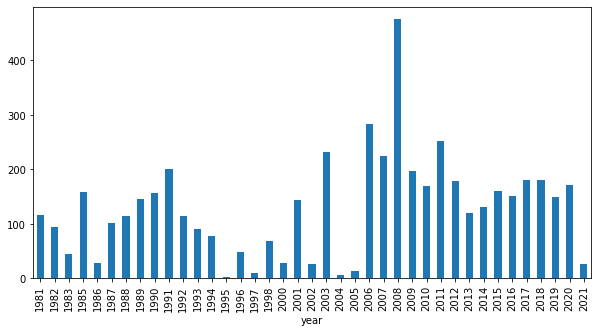

In [30]:
import matplotlib.pyplot as plt
f=plt.figure()
f.set_figwidth(10)
f.set_figheight(5)
amia_year['pmc_id'].plot.bar()